In [3]:
#ライブラリの読み込み
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

%precision 3

#可視化用
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

#seed値の固定
np.random.seed(0)

補間

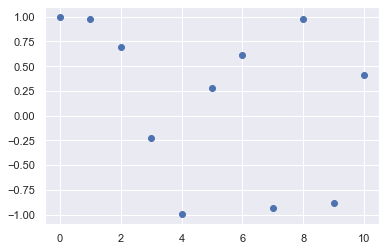

In [4]:
#xとして、linspaceで、開始が0、終了が10、項目が11つの等間隔数列を生成
x = np.linspace(0,10,num=11,endpoint=True)
#yの値を生成
y = np.cos(-x**2/5.0)

plt.plot(x,y,'o')
plt.grid(True)

↑上の図でx=4.5など実点と実点の間にあるxに対応するyを考えるのが補間計算である。(今回はccos関数を使用)

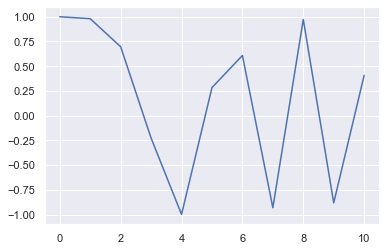

In [5]:
#線形補間:点と点を1次式でつなぐ

#scipyではデータ間の補間はinterpldで計算可能である。
from scipy import interpolate

#線形補間。interp1d(※lじゃなくて数字の1)のパラメータとしてlinearを指定する。
f = interpolate.interp1d(x,y,'linear')

plt.plot(x,f(x),'-')
plt.grid(True)

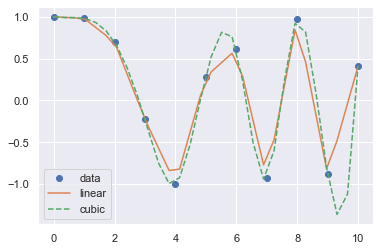

In [6]:
#スプライン3次補間:点と点の間を3次の多項式で補完する

#スプライン3次補間を計算してf2として追加する。パラメータにcubicを指定する
f2 = interpolate.interp1d(x,y,'cubic')

#曲線を出すためにxの値を細かくする
xnew = np.linspace(0,10,num=30,endpoint=True)

#グラフ化。fを直線で描き、f2を点線で描く
plt.plot(x,y,'o',xnew,f(xnew),'-',xnew,f2(xnew),'--')

#凡例
plt.legend(['data','linear','cubic'])
plt.grid(True)

線形代数：行列の分解

In [7]:
#特異値分解(SVD):行列Aに行列xをかけた時、元の行列がちょうどλ倍になるとき、xを固有ベクトル、λを固有値という

#(2,5)行列
A = np.array([[1,2,3,4,5],[6,7,8,9,10]])
#特異値分解の関数linalg.svd
U, s, Vs = sp.linalg.svd(A)
m,n = A.shape

S = sp.linalg.diagsvd(s,m,n)

print('U.S.V* = \n',U@S@Vs)

U.S.V* = 
 [[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]]


In [8]:
#LU分解
#データの準備
A = np.identity(5)
A[0,:] = 1
A[:,0] = 1
A[0,0] = 5
b = np.ones(5)

#正方行列をLU分解する
(LU,piv) = sp.linalg.lu_factor(A)

L = np.identity(5) + np.tril(LU,-1)
U = np.triu(LU)
P = np.identity(5)[piv]

#解を求める
x = sp.linalg.lu_solve((LU,piv),b)
#解答
print(x)

array([-3.,  4.,  4.,  4.,  4.])

In [11]:
#コレスキー分解
A = np.array([[7,-1,0,1],[-1,9,-2,2],[0,-2,8,-3],[1,2,-3,10]])
b = np.array([5,20,0,20])

L = sp.linalg.cholesky(A)

t = sp.linalg.solve(L.T.conj(),b)
x = sp.linalg.solve(L,t)

#解答
print(x)

[0.758 2.168 1.241 1.863]


In [12]:
#確認
np.dot(A,x)

array([5.000e+00, 2.000e+01, 2.665e-15, 2.000e+01])

In [13]:
#非負値行列因子分解(NMF)
from sklearn.decomposition import NMF

#分解対象行列
X = np.array([[1,1,1],[2,2,2],[3,3,3],[4,4,4]])

model = NMF(n_components=2,init='random',random_state=0)

W = model.fit_transform(X)
H = model.components_

print(W)
print(H)

[[0.425 0.222]
 [0.698 0.537]
 [0.039 1.434]
 [2.377 0.463]]
[[1.281 1.281 1.282]
 [2.058 2.058 2.058]]


In [14]:
#確認
np.dot(W,H) #W@Hでもよい

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.],
       [4., 4., 4.]])

積分と微分方程式

In [15]:
#積分計算
#ライブラリの読み込み
from scipy import integrate
import math

In [18]:
#ex)1
#∫0-1 4/(1+x**2)の積分を求める

#定義
def calcPi(x):
    return 4/(1+x**2)

#計算結果と推定誤差
integrate.quad(calcPi,0,1)

(3.142, 0.000)

In [17]:
#無名関数で書くことも可能
integrate.quad(lambda x: 4/(1+x**2), 0, 1)

(3.142, 0.000)

In [19]:
#ex)2
#sin関数を求める

from numpy import sin
integrate.quad(sin,0,math.pi/1)
#math.piは円周率

(2.000, 0.000)

In [20]:
#ex)3
#二重積分
#∫0-∞∫1-∞　e**-xt/t**n

def I(n):
    return integrate.dblquad(lambda t,x:np.exp(-x*t)/t**n,0,np.inf,lambda x: 1, lambda x: np.inf)

print('n=1の時:',I(1))
print('n=2の時:',I(2))
print('n=3の時:',I(3))
print('n=4の時:',I(4))

n=1の時: (0.9999999983857643, 1.1492024121278991e-07)
n=2の時: (0.499999999909358, 1.4640839512484866e-08)
n=3の時: (0.3333333333366853, 1.3888461883425516e-08)
n=4の時: (0.2500000000043577, 1.29830334693681e-08)


微分方程式の計算

In [21]:
#式はp114参照
#モジュールの読み込み
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#ローレンツ方程式
def lorenz_func(v,t,p,r,b):
    return [-p*v[0]+p*v[1],-v[0]*v[2]+r*v[0]-v[1],v[0]*v[1]-b*v[2]]

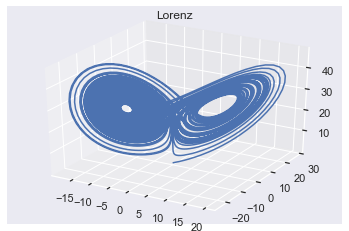

In [24]:
#パラメータの設定
p = 10
r = 28
b = 8/3
v0 = [0.1, 0.1, 0.1]
t = np.arange(0,100,0.01)

#関数の呼び出し
v = odeint(lorenz_func, v0, t, args=(p,r,b))

#可視化
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(v[:,0],v[:,1],v[:,2])

#ラベルなど
plt.title('Lorenz')
plt.grid(True)

最適化(線形計画法)

In [25]:
from scipy.optimize import fsolve

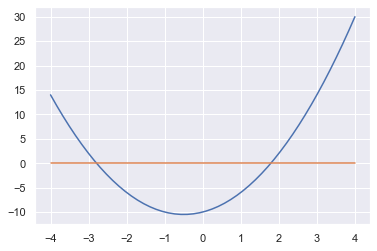

In [28]:
#二次関数の最適化

#定義
def f(x):
    y = 2*x**2 + 2*x - 10
    return y

#グラフ化
x = np.linspace(-4,4)
plt.plot(x,f(x))
plt.plot(x,np.zeros(len(x)))
plt.grid(True)

In [29]:
# x=2 付近
x = fsolve(f,2)
print(x)

[1.791]


In [30]:
# x=-3 付近
x = fsolve(f,-3)
print(x)

[-2.791]


グラフから解はx=2,-3付近にあることが分かるので、上の計算で解が求められる

In [32]:
#'最適化問題を解く'は飛ばす(p147参照)